#Q1.

##Importing dataset



In [204]:
import pandas as pd
df = pd.read_csv('DataClustering.csv')
display(df.head(20))

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
5,1.387625,0.746952,0.659933,0.887682
6,1.823524,0.980651,1.223185,0.667314
7,0.649790,0.940368,1.439827,0.783551
8,0.797687,1.151004,0.498679,0.902644
9,0.670005,1.017037,1.386835,0.715656


##Exploring dataset

In [205]:
display(df.shape)
display(df.columns)
columns = df.columns


(351, 4)

Index(['x1', 'x2', 'x3', 'x4'], dtype='object')

There are 4 columns and 351 points in the dataset. Further, no null value is present in the dataset which comprises all float type features.

In [206]:
display(df.info())
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


None

x1    0
x2    0
x3    0
x4    0
dtype: int64

In [207]:
df.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb6c480450>,
      dtype=object)

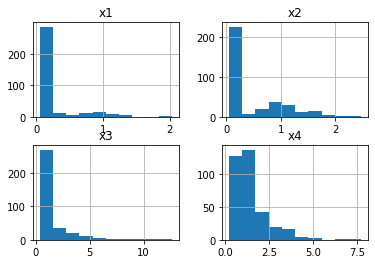

In [208]:
df.hist()

All the columns are mostly concentrated near zero as evident from the plot.

The plot being right skewed(mean>median), we can use square root, cube root or log transform. Out of the three, log transform looks more promising

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb6a665c10>,
      dtype=object)

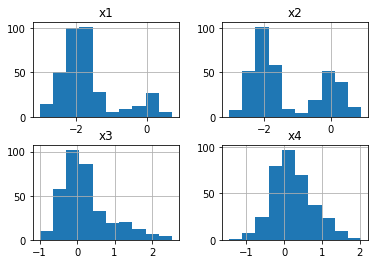

In [209]:
#from sklearn.preprocessing import PowerTransformer
import numpy as np
#from scipy.stats import boxcox
import matplotlib.pyplot as plt
#power = PowerTransformer(method='yeo-johnson')
#data_trans = np.sqrt(df)
#data_trans = np.cbrt(df)
df = np.log(df)
# data_trans = pd.DataFrame(data_trans)
df.hist()

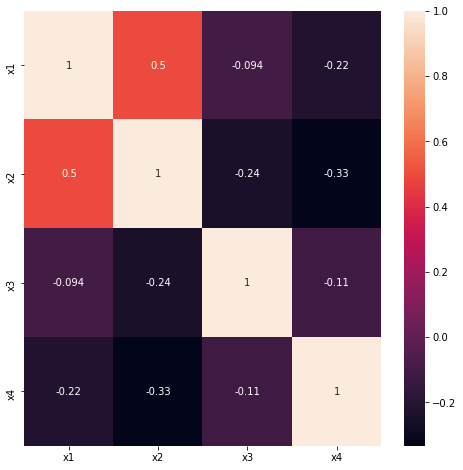

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb6d26d710>,
      dtype=object)

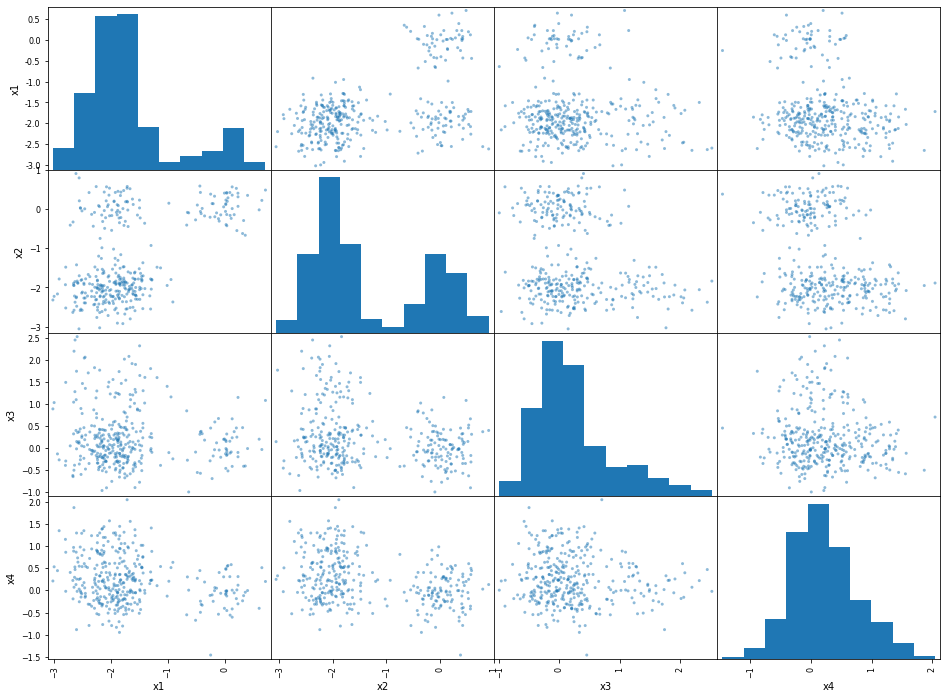

In [211]:
pd.plotting.scatter_matrix(df, figsize=(16,12))

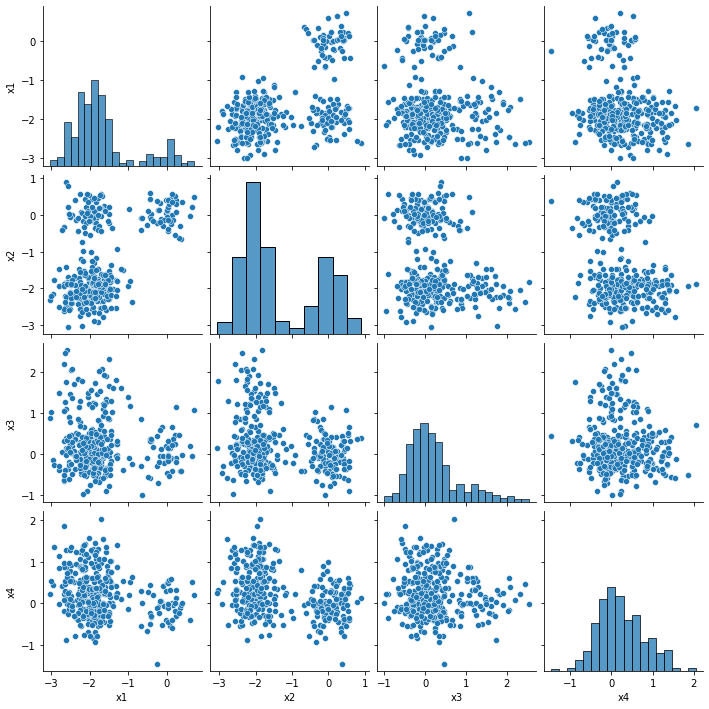

In [212]:
sns.pairplot(df)

Pairplot gives point relations between two features.

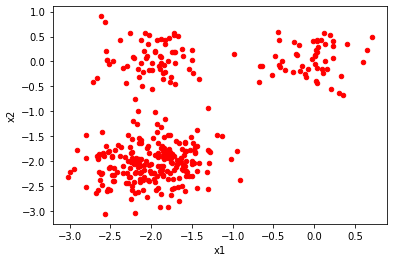

In [213]:
df.plot(x='x1', y='x2', kind='scatter', c='r')
#similarly can plot for other features

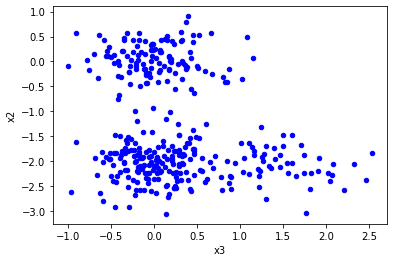

In [214]:
df.plot(x='x3', y='x2', kind='scatter', c='b')
#similarly can plot for other features

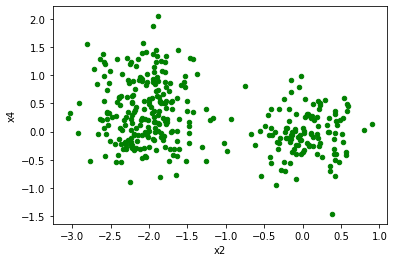

In [215]:
df.plot(x='x2', y='x4', kind='scatter', c='g')
#similarly can plot for other features

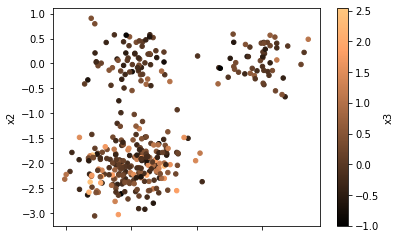

In [216]:
df.plot(x='x1', y='x2', kind='scatter', c='x3', colormap='copper')

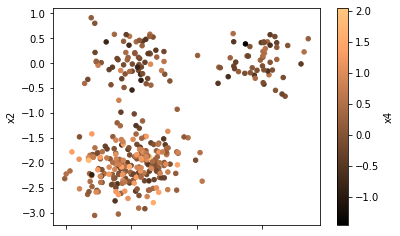

In [217]:
df.plot(x='x1', y='x2', kind='scatter', c='x4', colormap='copper')

##Clustering using K-means

In [218]:
# Calculating WCSS values for 1 to 10 clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(df)
  wcss.append(kmeans_model.inertia_)

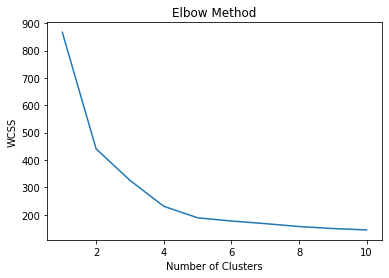

In [219]:
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Using the elbow method, the number of clusters can be chosen to be 5.

Converting to standard form for further processing

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [221]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
#y_kmns = kmeans_model.fit_predict(df)
kmeans_model.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [222]:
from sklearn.metrics import silhouette_score
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df, kmeans_model.labels_, metric='euclidean')))
#labels_scale = kmeans_model.labels_
#clusters_scale = pd.concat([df, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.38113666771488786


Since multiple features are used, polar plot is a convenient way to demonstrate the clustering results.

In [223]:
import plotly.express as px
clusters=pd.DataFrame(df,columns=columns)
clusters['label']=kmeans_model.labels_
clusters['y_pred'] = kmeans_model.predict(df)
centers = kmeans_model.cluster_centers_

polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig.show()

The actual clusters with 3 axes as three features and colour as fourth feature.

In [224]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#fig = make_subplots(rows=1, cols=2)
cl0 = clusters[clusters.y_pred==0]
cl1 = clusters[clusters.y_pred==1]
cl2 = clusters[clusters.y_pred==2]
cl3 = clusters[clusters.y_pred==3]
cl4 = clusters[clusters.y_pred==4]
trace1 = go.Scatter3d(x = cl0['x1'] , y = cl0['x2'], z = cl0['x3'],mode='markers',marker=dict(color= cl0['x4']))
trace2 = go.Scatter3d(x = cl1['x1'] , y = cl1['x2'], z = cl1['x3'],mode='markers',marker=dict(color= cl1['x4']))
trace3 = go.Scatter3d(x = cl2['x1'] , y = cl2['x2'], z = cl2['x3'],mode='markers',marker=dict(color= cl2['x4']))
trace4 = go.Scatter3d(x = cl3['x1'] , y = cl3['x2'], z = cl3['x3'],mode='markers',marker=dict(color= cl3['x4']))
trace5 = go.Scatter3d(x = cl4['x1'] , y = cl4['x2'], z = cl4['x3'],mode='markers',marker=dict(color= cl4['x4']))
data = [trace1, trace2, trace3, trace4, trace5]
fig=go.Figure(data = data)
#fig.add_trace(px.scatter_3d(cl1, x="x1", y="x2",z="x3",color="x4"),row = 1,col = 1)
#fig.add_trace(px.scatter_3d(cl2, x="x1", y="x2",z="x3",color="x4"),row = 1,col = 1)
#fig.add_trace(px.scatter_3d(cl3, x="x1", y="x2",z="x3",color="x4"),row = 1,col = 1)
#fig.add_trace(px.scatter_3d(cl4, x="x1", y="x2",z="x3",color="x4"),row = 1,col = 1)
#fig.update_layout(title="5 Features Representation")
fig.show()

##DBSCAN implementation

In [225]:
from sklearn.cluster import DBSCAN
#Varying hyperparameters
db = DBSCAN(eps=0.6, min_samples=4).fit(df)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_) 

5


For the epsilon = 0.6 & minimum samples = 4, we are getting number of clusters same as of K-means clustering

##t-SNE visualisation

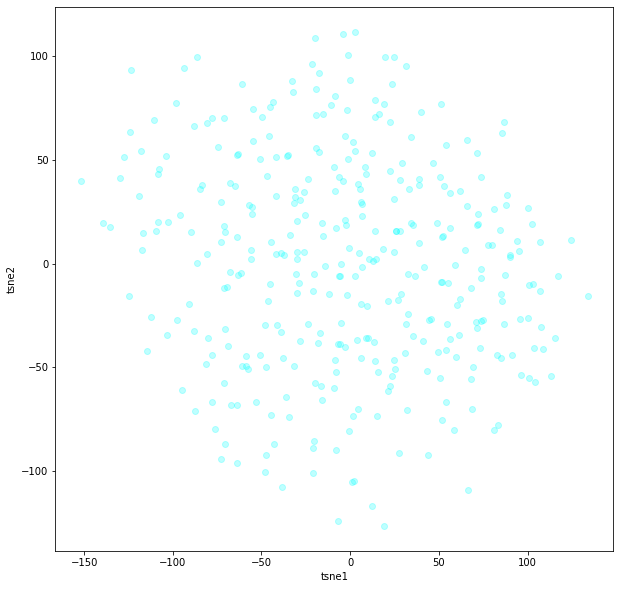

In [226]:
from sklearn.manifold import TSNE
tsne_df = TSNE(n_components=3).fit_transform(df) # Using n_components = 3

tsne_df = pd.DataFrame(tsne_df, columns=['tsne1','tsne2','tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df.iloc[:,0],tsne_df.iloc[:,1],alpha=0.25, facecolor='cyan')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()


Text(0, 0.5, 'Inertia')

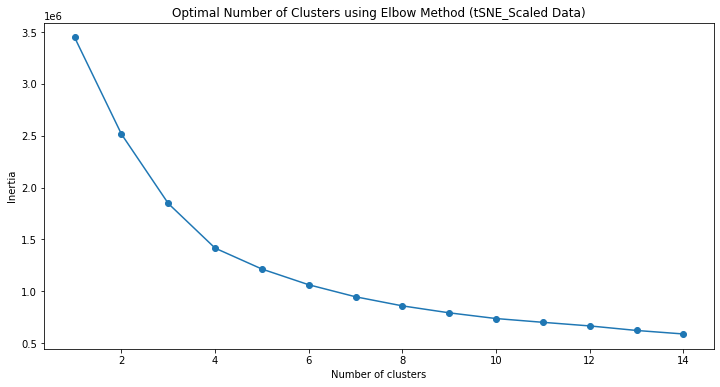

In [227]:
sse = []
for k in range(1, 15):
    km = KMeans(n_clusters=k)
    km.fit(tsne_df)
    sse.append([k, km.inertia_])
    
tsne_results = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [228]:
kmeans_tsne = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df, kmeans_tsne.labels_, metric='euclidean')))
labels_tsne = kmeans_tsne.labels_
clusters_tsne = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels_tsne})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.29976803064346313


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



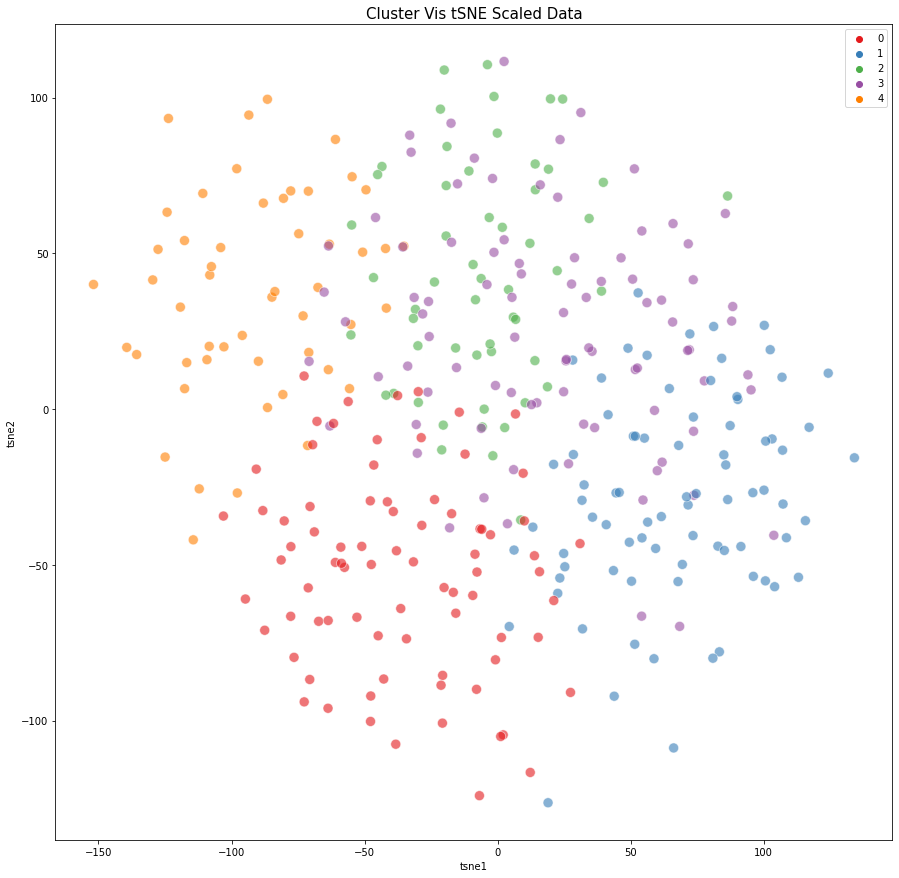

In [229]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne.iloc[:,0],clusters_tsne.iloc[:,1],hue=labels_tsne, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [230]:
axis = dict(xaxis = dict(title  = 'tsne1'), yaxis = dict(title  = 'tsne2'), zaxis = dict(title  = 'tsne3'))
labels = labels_tsne
trace = go.Scatter3d(x=clusters_tsne.iloc[:,0], y=clusters_tsne.iloc[:,1], z=clusters_tsne.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = axis, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

#Q2.

###Importing dataset

In [231]:
import pandas as pd
df1 = pd.read_csv('DataPCA.csv')
display(df1.head(20))

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
5,2.053153,-0.998620,6.209309,1.413750,3.806604,-1.180406,-0.342574
6,0.857204,-1.528327,4.346047,4.604816,4.768301,0.080011,-0.094112
7,0.974326,-1.299434,4.609923,3.957702,4.847828,0.551387,-0.397504
8,1.304399,-1.105422,5.334995,3.262553,4.167344,-0.520208,-0.070384
9,1.110547,-1.207944,5.025714,3.398416,4.258596,-0.560853,-0.063081


###Visualisation

In [232]:
display(df1.shape)
display(df1.columns)
columns = df1.columns


(190, 7)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')

7 features with 190 datapoints are present in the dataset. There is no null value and all features are of float type

In [233]:
display(df1.info())
display(df1.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


None

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

In [234]:
df1.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb6826ee90>,
      dtype=object)

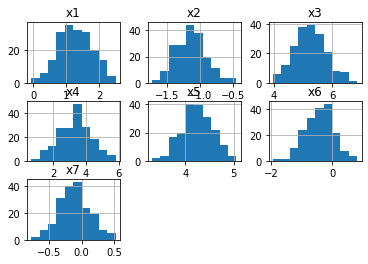

In [235]:
df1.hist()

The histogram of each column looks fine and no change is required.

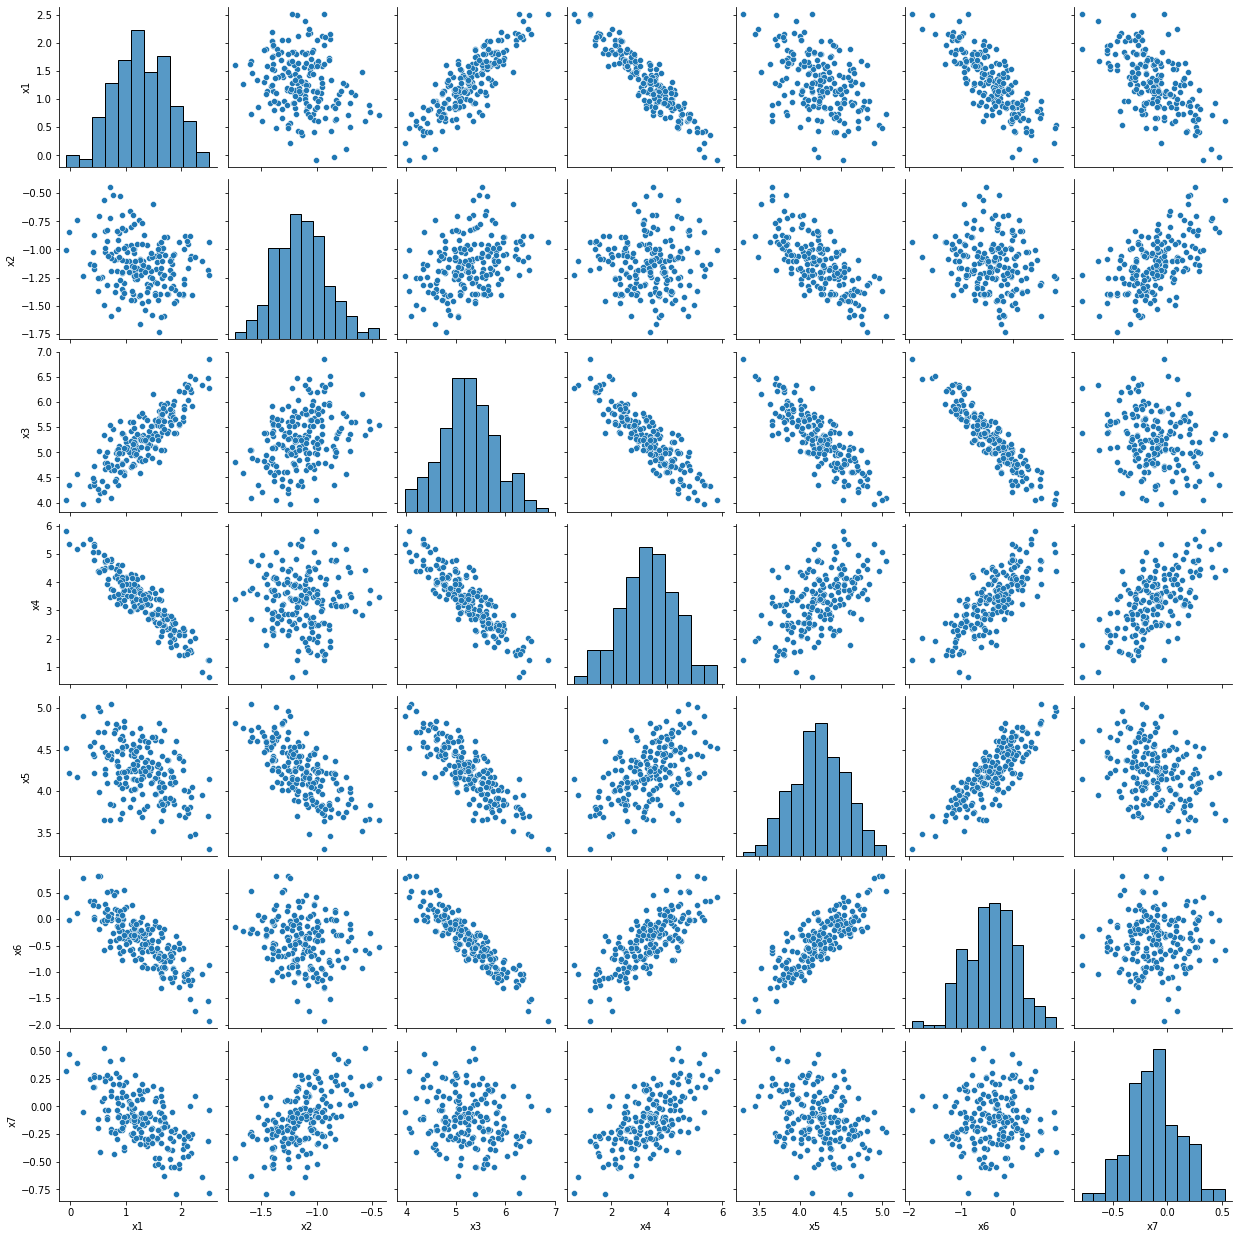

In [236]:
import seaborn as sns
sns.pairplot(df1)

Pairplot shows high correlation between some of the columns.

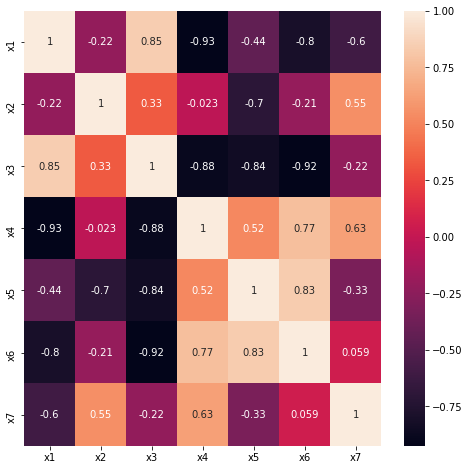

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(), annot=True)

Transforming to standard form of data

In [238]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [239]:
from sklearn.decomposition import PCA 

###PCA computation and reconstruction

[4.28745955 2.24805866]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

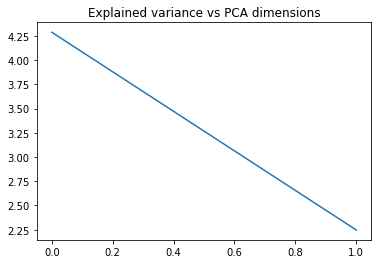

In [240]:
pca = PCA(n_components=2)
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
pComponents = pca.fit_transform(df1) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = pca.components_
var = pca.explained_variance_
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

In [241]:
df_recon = pca.inverse_transform(pComponents)
from sklearn.metrics import mean_squared_error
print('With n_components=2, MSE:',mean_squared_error(df1, df_recon))

With n_components=2, MSE: 0.071268465553543


[4.28745955 2.24805866 0.45709919]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

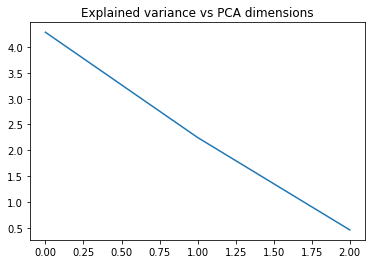

In [242]:
pca = PCA(n_components=3)
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
pComponents = pca.fit_transform(df1) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = pca.components_
var = pca.explained_variance_
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

In [243]:
df_recon = pca.inverse_transform(pComponents)
from sklearn.metrics import mean_squared_error
print('With n_components=3, MSE:',mean_squared_error(df1, df_recon))

With n_components=3, MSE: 0.0063122644854415886


[4.28745955 2.24805866 0.45709919 0.0427316 ]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

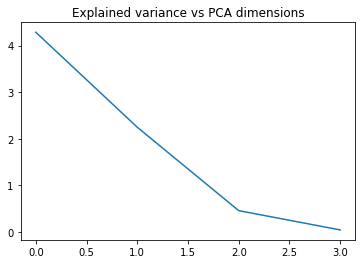

In [244]:
pca = PCA(n_components=4)
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
pComponents = pca.fit_transform(df1) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = pca.components_
var = pca.explained_variance_
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

In [245]:
df_recon = pca.inverse_transform(pComponents)
from sklearn.metrics import mean_squared_error
print('With n_components=4, MSE:',mean_squared_error(df1, df_recon))

With n_components=4, MSE: 0.00023987869019137447


[4.28745955e+00 2.24805866e+00 4.57099193e-01 4.27316037e-02
 1.52019465e-03]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

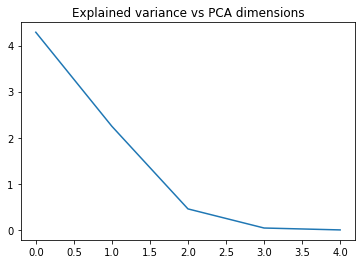

In [246]:
pca = PCA(n_components=5) #Using n_components = 3
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
pComponents = pca.fit_transform(df1) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = pca.components_
var = pca.explained_variance_
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

In [247]:
df_recon = pca.inverse_transform(pComponents)
from sklearn.metrics import mean_squared_error
print('With n_components=5, MSE:',mean_squared_error(df1, df_recon))

With n_components=5, MSE: 2.3851029452933933e-05


[4.28745955e+00 2.24805866e+00 4.57099193e-01 4.27316037e-02
 1.52019465e-03 1.39657631e-04]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

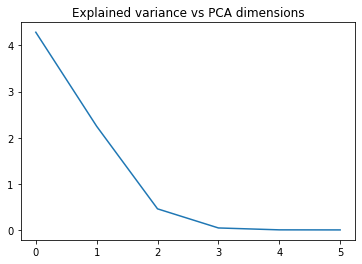

In [248]:
pca = PCA(n_components=6)
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
pComponents = pca.fit_transform(df1) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = pca.components_
var = pca.explained_variance_
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

In [249]:
df_recon = pca.inverse_transform(pComponents)
from sklearn.metrics import mean_squared_error
print('With n_components=6, MSE:',mean_squared_error(df1, df_recon))

With n_components=6, MSE: 4.0049451070753984e-06


[4.28745955e+00 2.24805866e+00 4.57099193e-01 4.27316037e-02
 1.52019465e-03 1.39657631e-04 2.81829470e-05]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

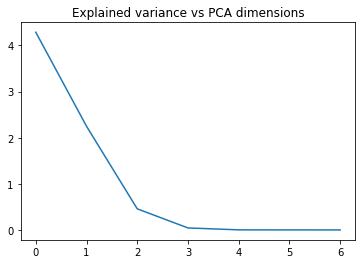

In [250]:
pca = PCA(n_components=7)
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
pComponents = pca.fit_transform(df1) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = pca.components_
var = pca.explained_variance_
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

In [251]:
df_recon = pca.inverse_transform(pComponents)
from sklearn.metrics import mean_squared_error
print('With n_components=7, MSE:',mean_squared_error(df1, df_recon))

With n_components=7, MSE: 2.6966669898766296e-31


Therefore, we observe that with increase in dimensions less error is encountered after reconstruction as transformation from 'n' original dimension to 'm' reduced dimension loses the data and with high 'm' the losses are also reduced but with the cost of computation and area.

#Q3.

###Importing dataset

In [252]:
import pandas as pd
df2 = pd.read_csv('DataKPCA.csv')
display(df2.head(20))

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
5,4.080436,15.757592,-51.584116,-4.041382,-1.540466,1.758137,1.858052
6,2.612302,12.774417,-43.302579,-11.694014,-3.052708,2.041606,1.955158
7,2.724491,14.080700,-44.897453,-10.306765,-3.202603,2.351700,1.840750
8,3.077564,15.167400,-48.562751,-8.723235,-2.042683,1.807550,1.966046
9,2.863602,14.595498,-47.127908,-9.040325,-2.182095,1.798212,1.969454


In [253]:
display(df2.info())
display(df2.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


None

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

7 features with 190 datapoints are present in the dataset. There is no null value and all features are of float type

In [254]:
df2.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


###Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb6899e9d0>,
      dtype=object)

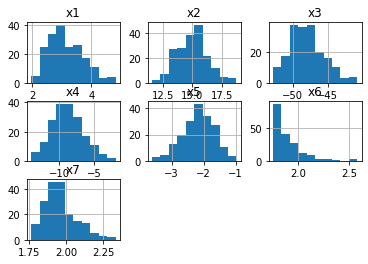

In [255]:
df2.hist()

The histogram of each column looks fine apart from column x6.Moving on with no change in the data.

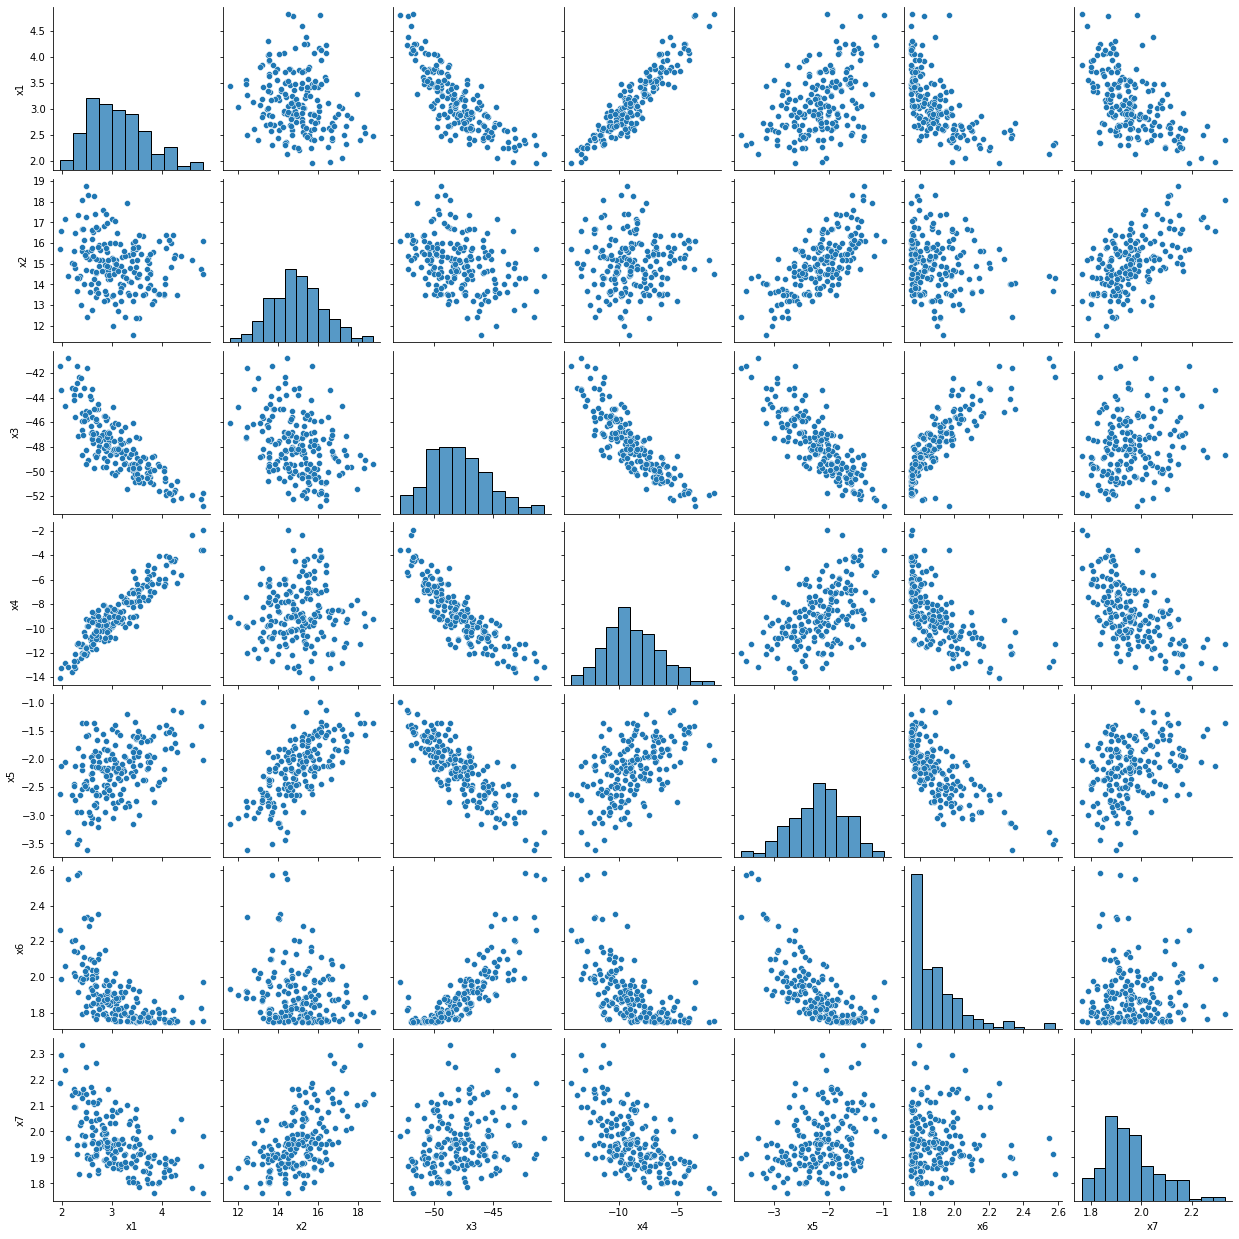

In [256]:
import seaborn as sns
sns.pairplot(df2)

Pairplot shows high correlation between some of the columns.

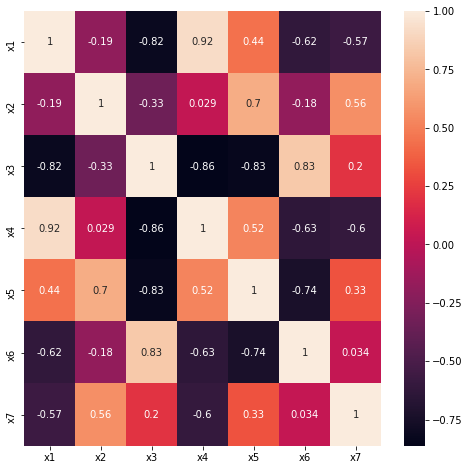

In [257]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True)

Converting data to standard form for further processing

In [258]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df2)

###KPCA training and plotting result

In [259]:
from sklearn.decomposition import KernelPCA as KPCA
import numpy as np

[0.14807904 0.10631211]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

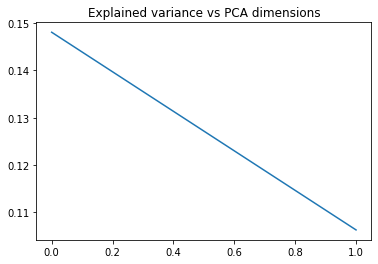

In [260]:
kpca = KPCA(n_components=2,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

[0.14807904 0.10631211 0.09957545]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

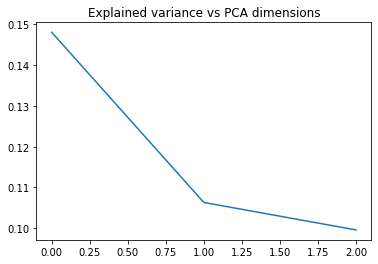

In [261]:
kpca = KPCA(n_components=3,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

[0.14807904 0.10631211 0.09957545 0.04579814]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

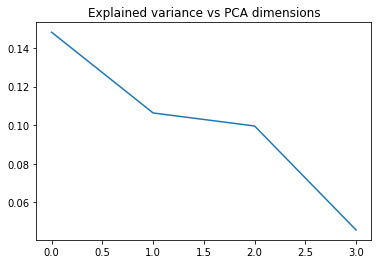

In [262]:
kpca = KPCA(n_components=4,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

[0.14807904 0.10631211 0.09957545 0.04579814 0.04268317]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

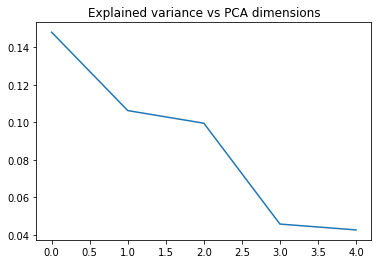

In [263]:
kpca = KPCA(n_components=5,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

[0.14807904 0.10631211 0.09957545 0.04579814 0.04268317 0.03428645]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning:

invalid value encountered in multiply



Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

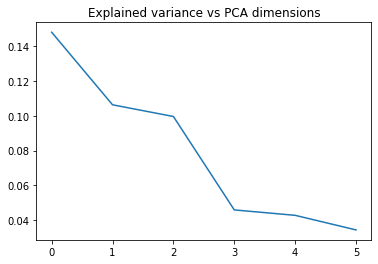

In [264]:
kpca = KPCA(n_components=6,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

[0.14807904 0.10631211 0.09957545 0.04579814 0.04268317 0.03428645
 0.02913138]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

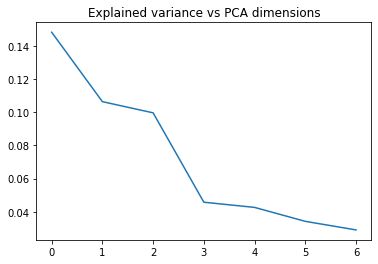

In [265]:
kpca = KPCA(n_components=7,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

[0.14807904 0.10631211 0.09957545 0.04579814 0.04268317 0.03428645
 0.02913138 0.02046354]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

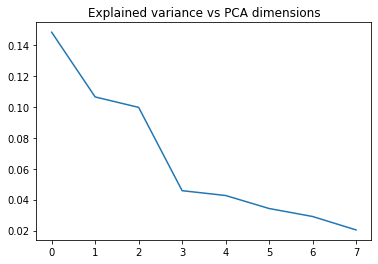

In [266]:
kpca = KPCA(n_components=8,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

[0.14807904 0.10631211 0.09957545 0.04579814 0.04268317 0.03428645
 0.02913138 0.02046354 0.01659669]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

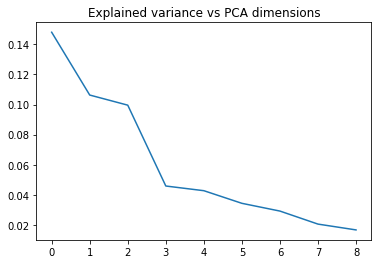

In [267]:
kpca = KPCA(n_components=9,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

[0.14807904 0.10631211 0.09957545 0.04579814 0.04268317 0.03428645
 0.02913138 0.02046354 0.01659669 0.01434459]


Text(0.5, 1.0, 'Explained variance vs PCA dimensions')

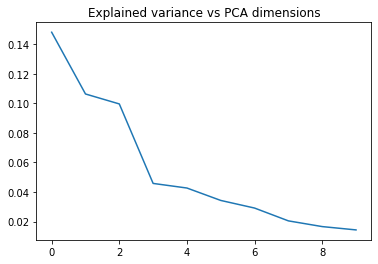

In [268]:
kpca = KPCA(n_components=10,kernel = 'rbf')
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance.
kpca_transform = kpca.fit_transform(df2) 
#pDf = pd.DataFrame(data = pComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
#display(pDf.head(5)) # prints the top 5 rows
comp = kpca.n_components
var = explained_variance = np.var(kpca_transform, axis=0)
#print(comp)
print(var)
plt.plot(var)
plt.title('Explained variance vs PCA dimensions')

The eplained variance vs dimensions is plotted for upto 10 dimensions

#References

https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE

https://plotly.com/python/3d-scatter-plots/

https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://github.com/NeuromatchAcademy/course-content/blob/NMA2020/tutorials/W1D5_DimensionalityReduction/W1D5_Tutorial3.ipynb